In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Statistical Tests
import scipy.stats as stats

from scipy.stats import norm

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.dates as dates
import seaborn as sns
from sklearn.model_selection import learning_curve
import datetime

pd.options.display.float_format = '{:20,.2f}'.format

import env

from wrangle import clean_zillow, missing_zero_values_table, features_missing, handle_missing_values, get_zillow_data, split, seperate_y, scale_data, split_seperate_scale 

import explore

In [2]:
df = pd.read_csv("zillowcluster_df.csv")
df = clean_zillow(df)

In [3]:
df.head()

,heatingorsystemtypeid,airconditioningtypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,poolcnt,...,age_bin,baths_per_sqft,taxrate,acres,acres_bin,sqft_bin,bath_bed_ratio,la_county,orange_county,ventura_county
parcelid,,,,,,,,,,,,,,,,,,,,,
10711855,2.00,5.00,2.00,3.00,"2,107.00",6037,34.22,-118.62,"9,158.00",1.00,...,0.33,0.00,1.23,0.21,0.30,0.50,0.67,1,0,0
10711877,2.00,1.00,2.00,4.00,"1,882.00",6037,34.22,-118.62,"9,035.00",1.00,...,0.33,0.00,1.23,0.21,0.30,0.40,0.50,1,0,0
10711888,2.00,1.00,2.00,4.00,"1,882.00",6037,34.22,-118.62,"9,800.00",0.00,...,0.33,0.00,1.23,0.22,0.30,0.40,0.50,1,0,0
10711910,2.00,5.00,2.00,3.00,"1,477.00",6037,34.22,-118.62,"11,285.00",1.00,...,0.47,0.00,1.43,0.26,0.30,0.30,0.67,1,0,0
10711923,2.00,5.00,2.00,4.00,"1,918.00",6037,34.22,-118.62,"11,239.00",1.00,...,0.47,0.00,1.26,0.26,0.30,0.40,0.50,1,0,0


In [4]:
missing_zero_values_table(df)

Your selected dataframe has 30 columns and 73199 Rows.
There are 0 columns that have NULL values.


,Zero Values,null_count,% of Total Values,Total Zeroes + Null Values,% Total Zero + Null Values,Data Type
heatingorsystemtypeid,0,0,0.00,0,0.00,float64
airconditioningtypeid,0,0,0.00,0,0.00,float64
orange_county,53095,0,0.00,53095,72.50,uint8
la_county,26201,0,0.00,26201,35.80,uint8
bath_bed_ratio,0,0,0.00,0,0.00,float64
sqft_bin,3421,0,0.00,3421,4.70,float64
acres_bin,7813,0,0.00,7813,10.70,float64
acres,0,0,0.00,0,0.00,float64
taxrate,0,0,0.00,0,0.00,float64
baths_per_sqft,65,0,0.00,65,0.10,float64


In [5]:
train, validate, test = split(df)

In [6]:
X_train, y_train, X_validate, y_validate, X_test, y_test = seperate_y(train, validate, test)

In [7]:
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test)

In [8]:
num_d = train.select_dtypes(exclude=['object', 'uint8', 'datetime64[ns]'])

In [9]:

quant_vars = list(num_d.columns.values)

In [10]:
quant_vars

['heatingorsystemtypeid',
 'airconditioningtypeid',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'roomcnt',
 'fireplaceflag',
 'taxvaluedollarcnt',
 'taxamount',
 'logerror',
 'age_of_home',
 'age_bin',
 'baths_per_sqft',
 'taxrate',
 'acres',
 'acres_bin',
 'sqft_bin',
 'bath_bed_ratio']

In [11]:
def heat_map(train):
    plt.figure(figsize=(22,14))
    q = sns.heatmap(df.corr(), cmap='RdYlBu', annot=True, center=0)
    return q

In [12]:
def pair_plot(df):
    p = sns.pairplot(df)
    return p

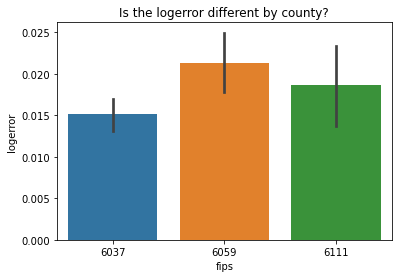

In [13]:

sns.barplot(data = train, x = 'fips', y = 'logerror')
plt.title("Is the logerror different by county?")
plt.show()

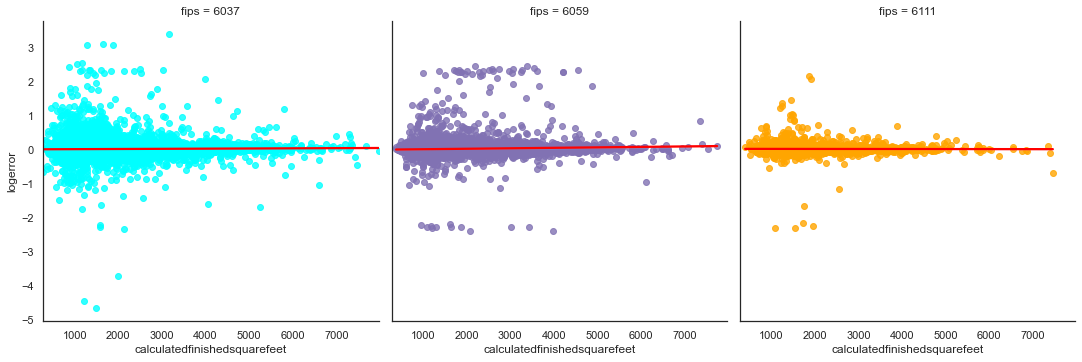

In [54]:

sns.lmplot(x='calculatedfinishedsquarefeet', y='logerror', col='fips', data=train, fit_reg=True, hue='fips', palette=dict({6037:"cyan", 6059:"m", 6111:"orange"}), line_kws={'color': 'red'})


plt.show()



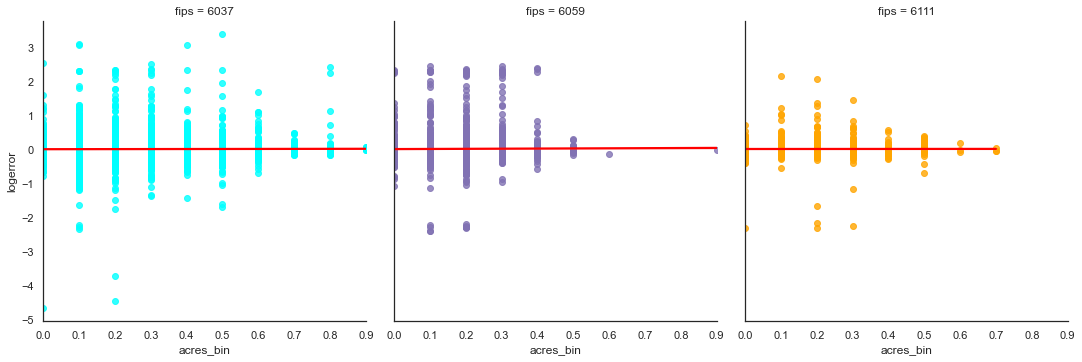

In [58]:
sns.lmplot(x='acres_bin', y='logerror', col='fips', data=train, fit_reg=True, hue='fips', palette=dict({6037:"cyan", 6059:"m", 6111:"orange"}), line_kws={'color': 'red'})


plt.show()


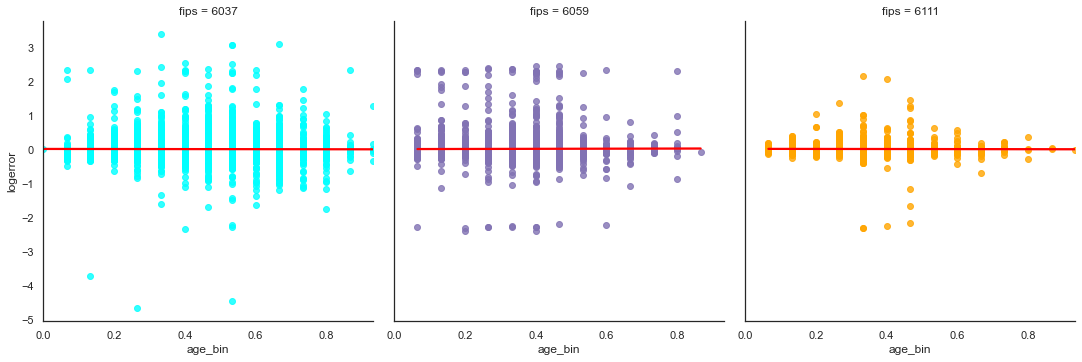

In [59]:
sns.lmplot(x='age_bin', y='logerror', col='fips', data=train, fit_reg=True, hue='fips', palette=dict({6037:"cyan", 6059:"m", 6111:"orange"}), line_kws={'color': 'red'})


plt.show()

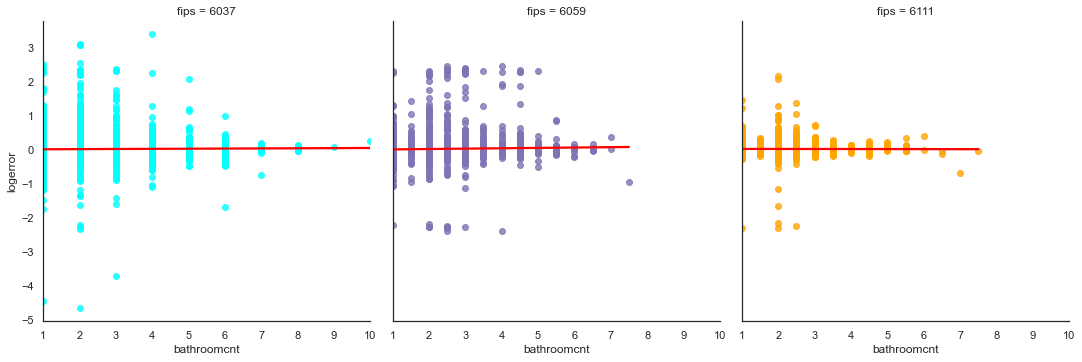

In [60]:
sns.lmplot(x='bathroomcnt', y='logerror', col='fips', data=train, fit_reg=True, hue='fips', palette=dict({6037:"cyan", 6059:"m", 6111:"orange"}), line_kws={'color': 'red'})


plt.show()

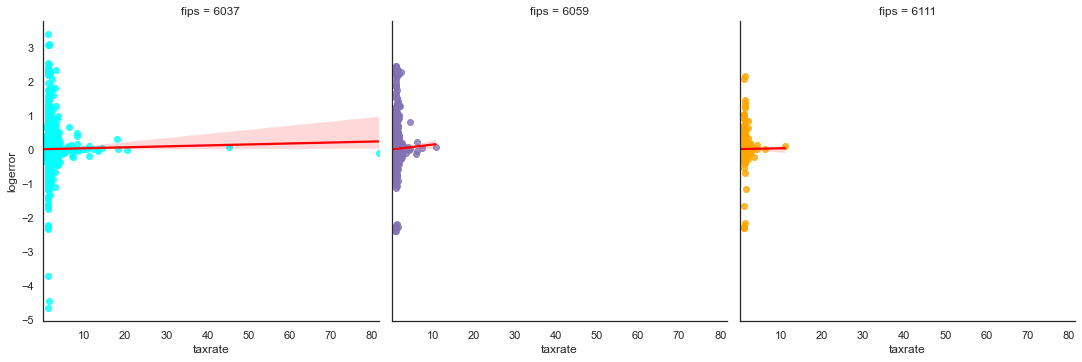

In [61]:
sns.lmplot(x='taxrate', y='logerror', col='fips', data=train, fit_reg=True, hue='fips', palette=dict({6037:"cyan", 6059:"m", 6111:"orange"}), line_kws={'color': 'red'})


plt.show()

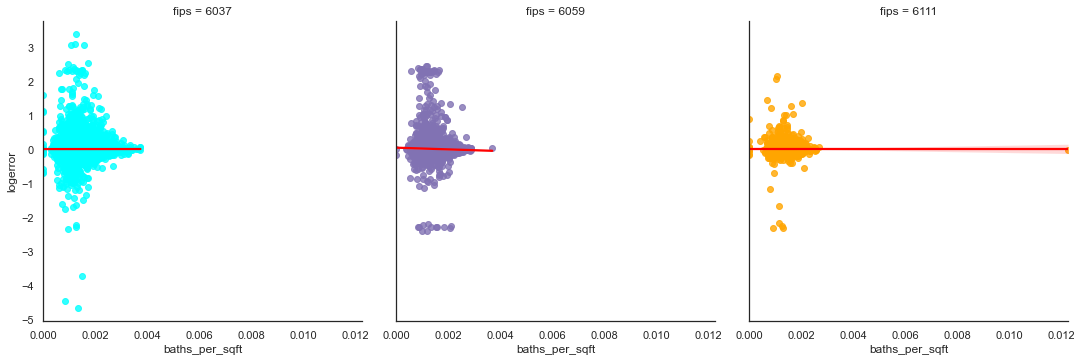

In [65]:
sns.lmplot(x='baths_per_sqft', y='logerror', col='fips', data=train, fit_reg=True, hue='fips', palette=dict({6037:"cyan", 6059:"m", 6111:"orange"}), line_kws={'color': 'red'})


plt.show()

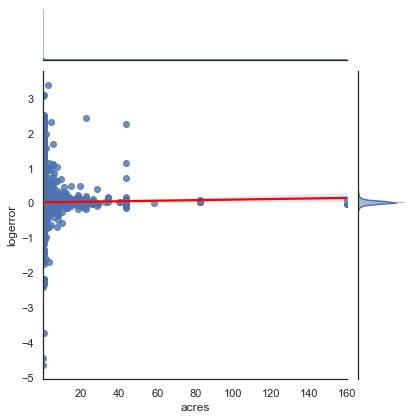

In [15]:

logroom = sns.jointplot(x="acres", y="logerror", data=train, kind='reg')
regline = logroom.ax_joint.get_lines()[0]
regline.set_color('red')
regline.set_zorder(5)

acreage seems to create a higher positive log error as it increases

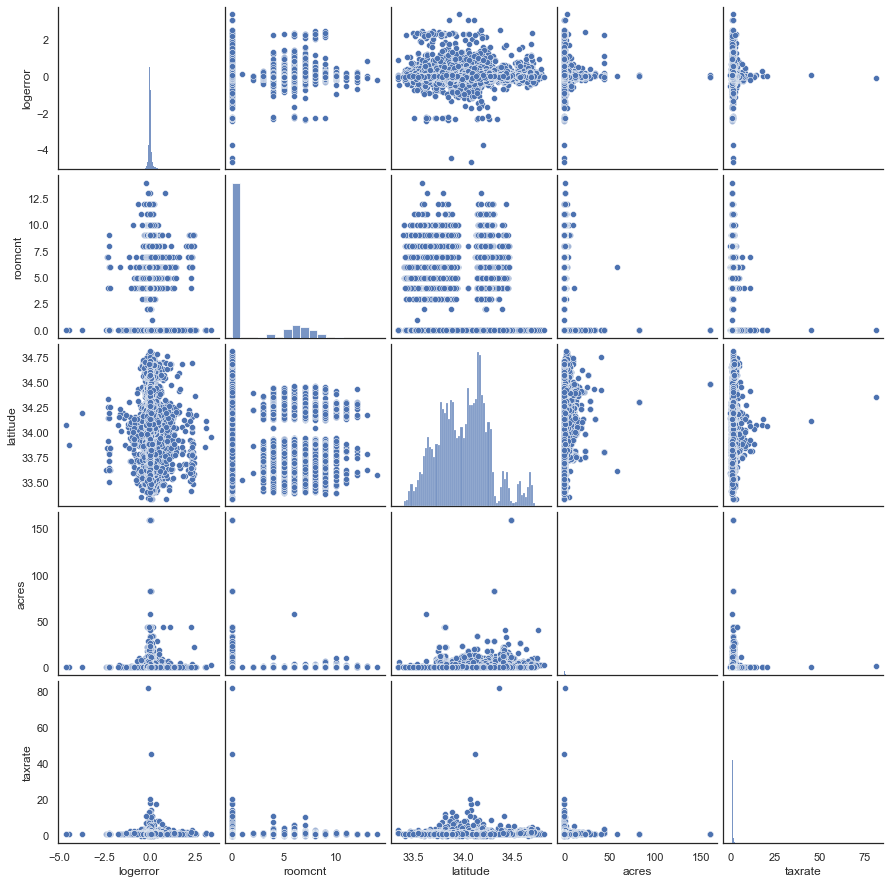

In [55]:
sns.pairplot(data=train[['logerror','roomcnt','latitude', 'acres', 'taxrate']], corner=False )